# Emotion Detection Model Training

This Jupyter Notebook outlines the process of training a machine learning model for the Real-Time Emotion Detection System. It covers data loading, preprocessing, model creation, training, and evaluation.

## Import Necessary Libraries

In [5]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

2023-11-28 10:52:34.313627: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-28 10:52:34.321168: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-28 10:52:34.361892: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-28 10:52:34.363205: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-28 10:52:35.470538: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

##Set Up Data Generators

In [9]:
# Path to the dataset
dataset_path = './data/emotions_dataset'

# Image dimensions and batch size
img_width, img_height = 48, 48
batch_size = 32

# Data augmentation and generators
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=30, 
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2, 
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)  # 20% of data for validation

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')



Found 28713 images belonging to 7 classes.
Found 7174 images belonging to 7 classes.


##Build the Model

In [10]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 emotions
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])

# Model summary
model.summary()



2023-11-28 11:00:08.225116: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-28 11:00:08.409846: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 128)         0

##Train the Model

In [11]:
epochs = 25  # Adjust based on your requirements
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)


Epoch 1/25
897/897 [==============================] - 36s 39ms/step - loss: 1.8199 - accuracy: 0.2436 - val_loss: 1.7721 - val_accuracy: 0.2561
Epoch 2/25
897/897 [==============================] - 29s 32ms/step - loss: 1.7791 - accuracy: 0.2659 - val_loss: 1.7447 - val_accuracy: 0.2806
Epoch 3/25
897/897 [==============================] - 29s 33ms/step - loss: 1.7548 - accuracy: 0.2791 - val_loss: 1.7276 - val_accuracy: 0.2912
Epoch 4/25
897/897 [==============================] - 31s 34ms/step - loss: 1.7339 - accuracy: 0.2900 - val_loss: 1.6861 - val_accuracy: 0.3142
Epoch 5/25
897/897 [==============================] - 29s 32ms/step - loss: 1.7000 - accuracy: 0.3087 - val_loss: 1.6557 - val_accuracy: 0.3400
Epoch 6/25
897/897 [==============================] - 30s 33ms/step - loss: 1.6710 - accuracy: 0.3269 - val_loss: 1.6141 - val_accuracy: 0.3665
Epoch 7/25
897/897 [==============================] - 29s 32ms/step - loss: 1.6208 - accuracy: 0.3564 - val_loss: 1.5704 - val_accuracy:

##Plot Training Results

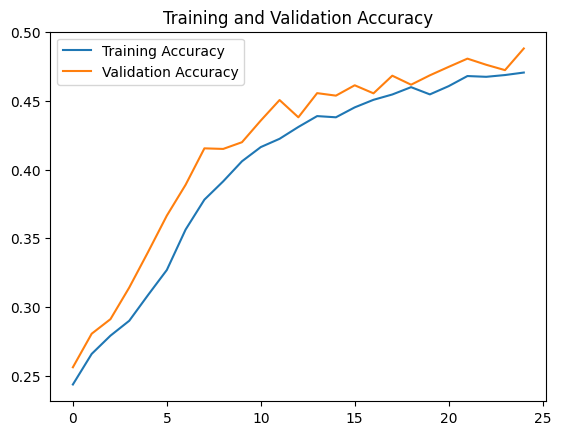

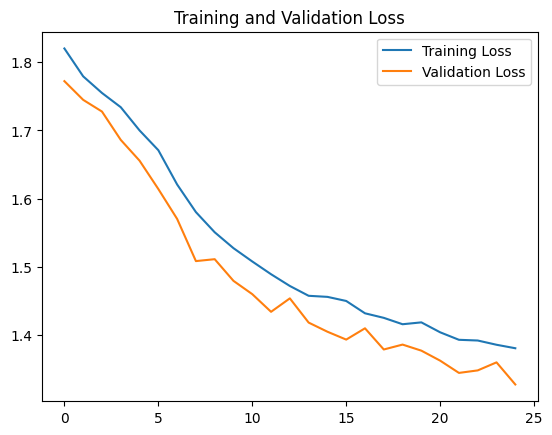

In [12]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()



##Save the Trained Model

In [14]:
model.save('/models/emotion_detection_model.h5')